Chapter 27
# 单位球体的三维几何变换
Book_2《可视之美》 | 鸢尾花书：从加减乘除到机器学习  

In [1]:
# 导入包
from mpl_toolkits.mplot3d import axes3d
import matplotlib.pyplot as plt
import numpy as np
import os
# 如果文件夹不存在，创建文件夹
if not os.path.isdir("Figures"):
    os.makedirs("Figures")

## 可视化函数

In [3]:
def visualize(x,y,z,axes,elev,azim,idx,fig,facecolors):
    ax = fig.add_subplot(2,2,idx, projection = '3d')
    
    ax.plot((0,-4),(0,0),(0,0), c = 'r', lw = 0.25, ls = '--')
    ax.quiver(0, 0, 0, 
              4, 0, 0,
              length = 1, 
              color = 'r',
              normalize=False, 
              arrow_length_ratio = .07, 
              linestyles = 'solid',
              linewidths = 0.25, zorder = 1e5)
    
    ax.plot((0,0),(0,-4),(0,0), c = 'g', lw = 0.25, ls = '--')
    ax.quiver(0, 0, 0, 
              0, 4, 0,
              length = 1, 
              color = 'g',
              normalize=False, 
              arrow_length_ratio = .07, 
              linestyles = 'solid',
              linewidths = 0.25, zorder = 1e5)
    
    ax.plot((0,0),(0,0),(0,-4), c = 'b', lw = 0.25, ls = '--')
    ax.quiver(0, 0, 0, 
              0, 0, 4,
              length = 1, 
              color = 'b',
              normalize=False, 
              arrow_length_ratio = .07, 
              linestyles = 'solid',
              linewidths = 0.25, zorder = 1e5)
    
    ax.plot_surface(x, y, z, rstride=5, cstride=5, facecolors = facecolors, edgecolors='w', linewidth = 0.1)
    
    axis_1 = axes[0, :]
    axis_2 = axes[1, :]
    axis_3 = axes[2, :]

    ax.plot((axis_1[0],-axis_1[0]),
            (axis_1[1],-axis_1[1]),
            (axis_1[2],-axis_1[2]), 
            c = 'k', lw = 0.25, ls = '--')
    
    ax.plot((axis_2[0],-axis_2[0]),
            (axis_2[1],-axis_2[1]),
            (axis_2[2],-axis_2[2]), 
            c = 'k', lw = 0.25, ls = '--')
    
    ax.plot((axis_3[0],-axis_3[0]),
            (axis_3[1],-axis_3[1]),
            (axis_3[2],-axis_3[2]), 
            c = 'k', lw = 0.25, ls = '--')

    # ax.view_init(azim=60, elev=30) 
    ax.view_init(elev=elev, azim=azim)
    ax.set_proj_type('ortho')
    ax.set_xlim(-4,4)
    ax.set_ylim(-4,4)
    ax.set_zlim(-4,4)
    ax.axis('off')
    ax.grid(False)
    ax.set_xticks([])
    ax.set_yticks([])
    ax.set_zticks([])
    ax.set_box_aspect(aspect = (1,1,1))  

    
def visualize_4(x,y,z,axes,filename,facecolors):

    fig = plt.figure(figsize = (8,8))
    
    visualize(x,y,z,axes,30,60,1,fig,facecolors)
    
    visualize(x,y,z,axes,90, -90,2,fig,facecolors)
    # ax.view_init(elev=90, azim=-90) # x-y
    
    visualize(x,y,z,axes,0,-90,3,fig,facecolors)
    # ax.view_init(elev=0, azim=-90) # x-z
    
    visualize(x,y,z,axes,0, 0,4,fig,facecolors)
    # ax.view_init(elev=0, azim=0) # y-z
    

    fig.savefig('Figures/' + filename + '.svg', format='svg')
    

## 单位球

In [4]:
u = np.linspace(0, np.pi, 101)
v = np.linspace(0, 2 * np.pi, 101)

x = np.outer(np.sin(u), np.sin(v))
y = np.outer(np.sin(u), np.cos(v))
z = np.outer(np.cos(u), np.ones_like(v))

axes = np.array([[1.5, 0, 0],  # first axis
                 [0, 1.5, 0],  # second axis
                 [0, 0, 1.5]]) # third axis

In [5]:
colors = plt.cm.RdYlBu(np.linspace(0,1,101*101))
facecolors = colors.reshape(101,101,4)

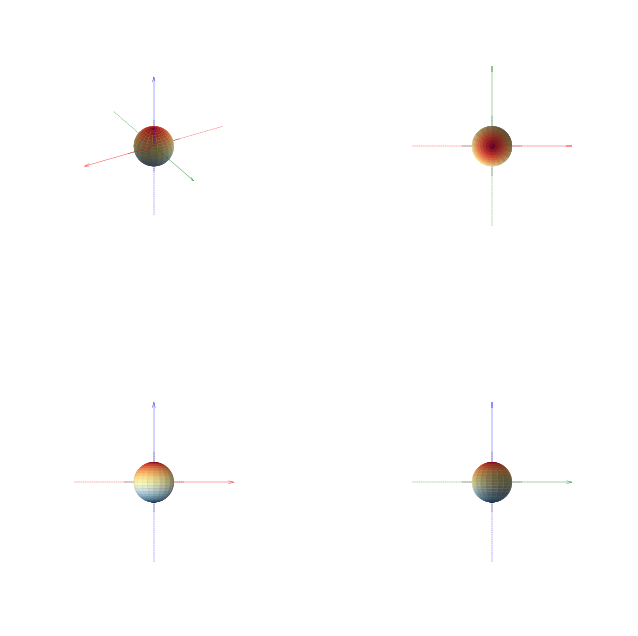

In [6]:
visualize_4(x,y,z, axes, '单位球',facecolors)

In [7]:
position = np.column_stack((x.flatten(),y.flatten(),z.flatten()))
position

array([[ 0.00000000e+00,  0.00000000e+00,  1.00000000e+00],
       [ 0.00000000e+00,  0.00000000e+00,  1.00000000e+00],
       [ 0.00000000e+00,  0.00000000e+00,  1.00000000e+00],
       ...,
       [-1.53488943e-17,  1.21499009e-16, -1.00000000e+00],
       [-7.68962088e-18,  1.22223024e-16, -1.00000000e+00],
       [-2.99951957e-32,  1.22464680e-16, -1.00000000e+00]])

In [ ]:
# 缩放 > 旋转
# xT @ x = 1
# A@x = z, A = V @ S
# x = inv(A) @ z
# zT @ inv(A @ AT) z = 1

## 等比例缩放

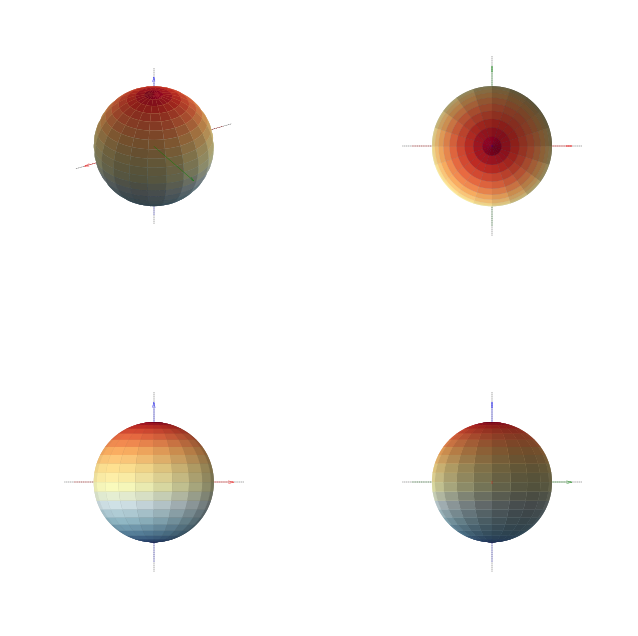

In [9]:
S_xyz = np.array([[3, 0, 0],
                  [0, 3, 0],
                  [0, 0, 3]])

position_trans = position @ S_xyz.T
axes_trans = axes @ S_xyz.T

x_trans = position_trans[:,0].reshape(x.shape)
y_trans = position_trans[:,1].reshape(x.shape)
z_trans = position_trans[:,2].reshape(x.shape)

visualize_4(x_trans,y_trans,z_trans, axes_trans, '等比例放大',facecolors)

## 非等比例缩放

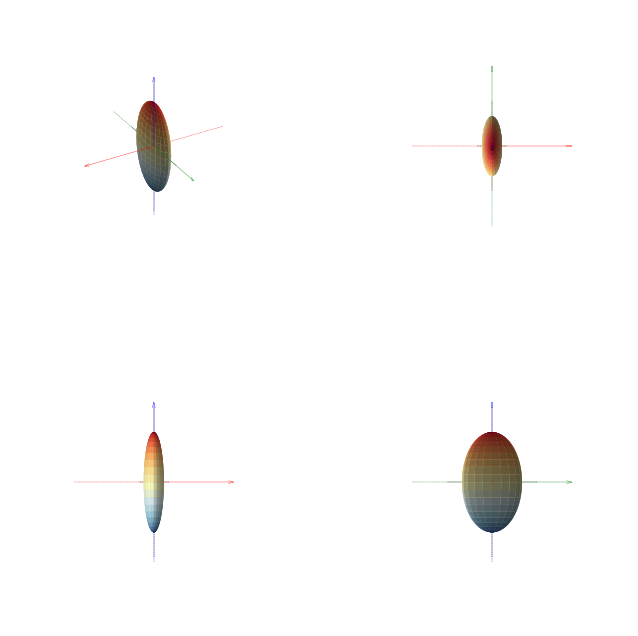

In [10]:
S_xyz = np.array([[0.5, 0, 0],
                  [0, 1.5, 0],
                  [0, 0, 2.5]])

position_trans = position @ S_xyz.T
axes_trans = axes @ S_xyz.T

x_trans = position_trans[:,0].reshape(x.shape)
y_trans = position_trans[:,1].reshape(x.shape)
z_trans = position_trans[:,2].reshape(x.shape)

visualize_4(x_trans,y_trans,z_trans,axes_trans, '非等比例缩放',facecolors)

## 缩放 + 压扁

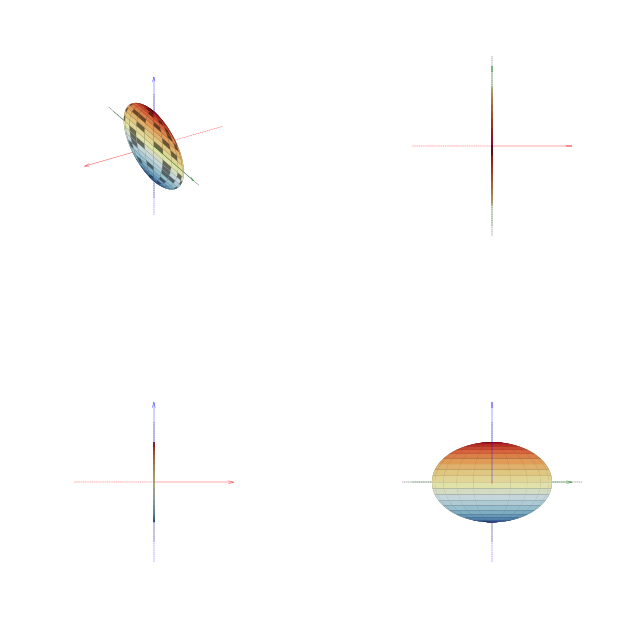

In [11]:
S_xz_y0 = np.array([[0, 0, 0],
                    [0, 3, 0],
                    [0, 0, 2]])

position_trans = position @ S_xz_y0.T
axes_trans = axes @ S_xz_y0.T

x_trans = position_trans[:,0].reshape(x.shape)
y_trans = position_trans[:,1].reshape(x.shape)
z_trans = position_trans[:,2].reshape(x.shape)

visualize_4(x_trans,y_trans,z_trans,axes_trans,'xz放大_y压扁',facecolors)

## 缩放 > 三次旋转

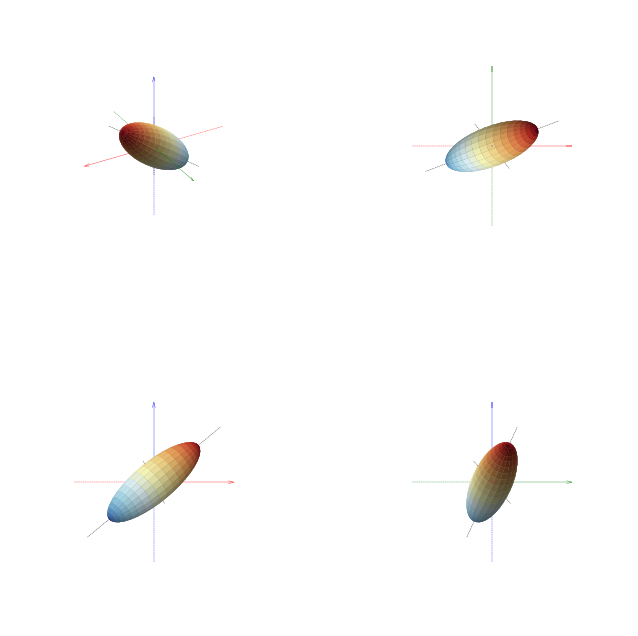

In [12]:
S_z = np.array([[1, 0, 0],
                [0, 1, 0],
                [0, 0, 3]])

alpha = np.deg2rad(30)

R_x = np.array([[1, 0,              0],
                [0, np.cos(alpha), -np.sin(alpha)],
                [0, np.sin(alpha),  np.cos(alpha)]])

beta = np.deg2rad(45)

# 从 y 正方向看
R_y = np.array([[np.cos(beta), 0, np.sin(beta)],
                [0,            1, 0],
                [-np.sin(beta),0, np.cos(beta)]])

gamma = np.deg2rad(60)

R_z = np.array([[np.cos(gamma), -np.sin(gamma), 0],
                [np.sin(gamma),  np.cos(gamma), 0],
                [0,              0,             1]])

position_trans = position @ S_z.T @ R_x.T @ R_y.T @ R_z.T
axes_trans = axes @ S_z.T @ R_x.T @ R_y.T @ R_z.T

x_trans = position_trans[:,0].reshape(x.shape)
y_trans = position_trans[:,1].reshape(x.shape)
z_trans = position_trans[:,2].reshape(x.shape)

visualize_4(x_trans,y_trans,z_trans,axes_trans, 'z放大 --- x旋转 --- y旋转 --- z旋转',facecolors)

## 缩放 > 剪切

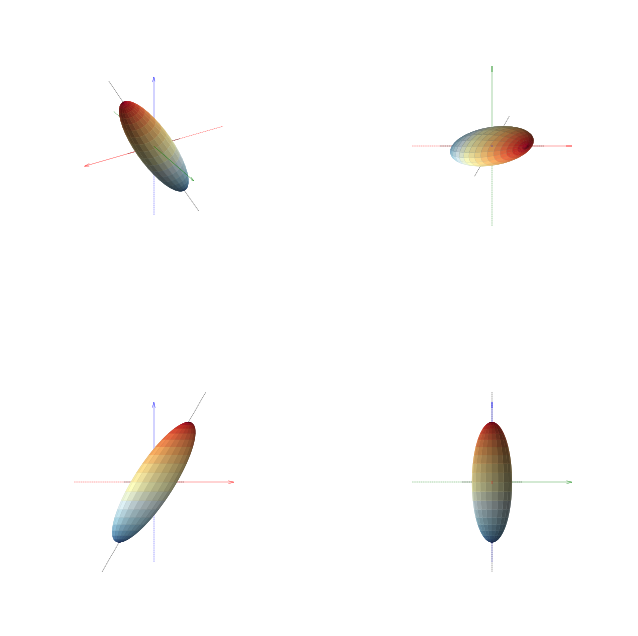

In [13]:
S_z = np.array([[1, 0, 0],
                [0, 1, 0],
                [0, 0, 3]])


theta = np.deg2rad(30)

T_x = np.array([[1, np.tan(theta), np.tan(theta)],
                [0, 1, 0],
                [0, 0, 1]])

position_trans = position @ S_z.T @ T_x.T
axes_trans = axes @ S_z.T @ T_x.T

x_trans = position_trans[:,0].reshape(x.shape)
y_trans = position_trans[:,1].reshape(x.shape)
z_trans = position_trans[:,2].reshape(x.shape)

visualize_4(x_trans,y_trans,z_trans,axes_trans,'z放大 --- x剪切',facecolors)